## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

In [1]:
#This is to import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


import warnings
warnings.filterwarnings('ignore')


import math
from time import time

%matplotlib inline
plt.style.use('bmh')

In [2]:
#Please put correct file to run rest of the cells.
rdf = pd.read_csv('winequality-red.csv')

In [3]:
rdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*TODO*

Before determining the analytic approach, one of the most important things in order to identify which analytical approach I need to take is to understand our final goal. Our goal is to determine a quality of each wine based on different chemical attributes in wines. We currently have a dataset that with 1599 rows.

In the next paragraph, I will address our scenario and why we need this.

In recent year, we learned that social drinking population grew, and the problem mentioned that industry players promote their product with product quality certificate. I believe there is a connection between social drinking population and industry’s tactic to promote their product. 

Firstly, I claim that we need to understand the nature of social drinking populations. They tend to be less knowledgeable when it comes to quality of wine. I believe there must be various factors to determine the quality of wine for those who are more experienced drinker. Those experienced drinker would pick wines for specific reasons such as their preference or brands. 

However, for social drinkers, they often be less experienced compares to those who are experienced. This may cause them to buy wine based on popularity or different reasons compare to experienced ones. One of the good reasons for them to purchase wines could be depends on quality measure that is provided by industry players or industry related players such as magazines or marketers. This might be why industry players start to promote their product based on quality certificate.

In order to measure quality of wines, there are two approaches mentioned in the case. First, it can be done by wine tasters. Since this is done by human, this tends to be very abstract and expensive to process. Second, it can also be done by physiochemical test. This is a laboratory based various chemical properties to obtain quality of wine which can be not only easier to control the process and the quality but also cheaper than the first approach.  Base on the case analysis, we now know what and why we need to achieve.

Based on those facts that I have mentioned above, I firmly believe the best choice is Predictive Approach. 

Firstly, I will like to start with the defintion of Predictive analytics. Predictive analytics uses the dataset, statistical algorithms and machine learning techniques to identify the likelihood of future output based on past dataset. 

As per IBM, predictive analytics is a branch of advanced analytics that makes prediction about future outcomes using historical data combined with statical modeling, data mining techniques and machine learning.  

As we have mentioned above, we need to determine a quality of wine based on the dataset we have from physiochemical test. Although we need to determine, this can be interpretate as prediction. Because, we would predict a quality of a particular wine based on the historical data. Thus, when we are given with a new wine, we would predict the quality of the wine.

Firstly, we will build a model based on the historical data, the wine quality. In the process of building a model, we will use various statistical model and machine learning techniques such as regressions and neural network. With this dataset, we will determine the performance of our model with testing dataset. This will give us how well our model will perform based on our training model. While we are determining the performance of our model. We will also perform parameter tunning for the model till we achieves the desired outcome for the model. Second, once the model is built, we will find patterns with in the given dataset to identify and illustrate the prediction of out model. Based on our issue, reason, and goal, I firmly believe that predictive approach would give us the most beneficial approach to not only understand the dataset but also extract meaningful insight from the dataset.


# Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*TODO*

There are many different attributes that could measure the quality of wine. As a matter of fact, the dataset, winequelity-red, contains all the important chemical features that should be a standard measure to assess the quality of wine. In the coming paragraph, we will address each attributes of the dataset and explain its definition and how it could be used as a measurement of the wine quality.

In the following paragraph, I will address each attributes of the dataset.

Fixed acidity is related to acids with wine and does not disappear easily compared to volatile acidity. This impacts the sourness of wine which is one of most fundamental aspects of wine taste. Thus, this is one of major wine quality measure.

Volatile acidity is similar feature to fixed acidity. However, this is more focused on smell or aroma of the wine. Due to the nature of product, wine, aroma is one of the most important feature to measure the quality. 

Citric acid. This is organic acid which could be used as natural preservative and additive to add source taste. In wine, citric acid is to increase acidity, and improve flavour. This often used as the final touch on wine and add fresh flavor. 

Residual sugar is from natural grape sugar that stays in a wine after fermentation is done. This often measured in grams per liter. It is one of important factors but also often based on one’s preference. 

Chlorides is a residual amount of salt in the wine. This is another factor that is based on one’s preference. This plays a key role in taste of saltiness in a wine.

Free sulfur dioxide, is often referred as SO2 in winemaking process. This prevents oxidation of wine and getting spoiled. 

Total sulfur dioxide is portion of SO2(Free Sulfur dioxide) plus other chemicals in the wine such as aldehydes, pigments, or sugars.

Density as the term explained it represents the density of the wine based on percentage of alcohol and sugar level.

pH is to measure how acidic or basic a wine is. Since acidity is one of important measure of wine. This tends to be related with acidity levels that mentioned above.
 
Sulphates, sulfites, is produced while a wine is in fermentation phase using yeast. This helps protecting against oxidation. This is correlated to free and total sulfur dioxide amounts.

Alcohol is percentage of alcohol content in wines. This often indicates one’s preference of choosing wines.


# Data Collection

**Q3. From where do we get our data?**

*TODO*

We have obtained the dataset at the University of Irvine webstie. 
The website is https://archive.ics.uci.edu/ml/datasets/wine+quality.



# Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**


The database repository mentioned that the dataset is related to red variants of Portuguese “Vinho Verde”, From the north of Portugal, wine. Also mentioned about the issues when it collected data such as privacy and logistic issues. Due to those issues, they won’t able to provide grape types, wine brand and the prices. 

The dataset is collected by Paulo Cortez, from University of Minho, Guimaraes, Portugal, A. Cerdeira, F.Almeida, T.Matos, J.Reis. The repository for the database is owned and managed by University of California Irvine.



**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

There will be many stakeholders that could benefit from the knowledge of relationship between given attributes and red wine quality. 

Of those stakeholders, we can distinguishes main stakeholders and secondary stakeholders.

Though this knowledge could impacts both groups, this paragraph will solely focus on the main stakeholder. There are main stakeholders i) producer ii) distributors, iii) promotors, and iv) store owners.

Next cells will address all stakeholders.


## Stakeholder

### Producer

Producer group will be one of the main beneficiaries of the knowledges of the dataset. They would have the most knowledge from picking main ingredients of wines to their wine recipes. The main ingredients of wines would be grapes. In the process of picking grapes would be based on region and types. But also, quality can be vary based on the weather of particular region. Thus, understanding changes based on regions, types and weather on certain year would result in changes in all attributes that is given in the dataset. 

Therefore, understanding each attributes changes based on different factors in the processing of producing wine and how all attributes impact on quality of wine would be helpful for them to choose ingredients and wine recipes. Also, by understanding these would help them to choose cost and benefit analysis to minimize their cost while maintaining the quality of wine. So that they can stay competitive in the market. 

### Distributor

This can be used in two different ways.

Firstly, Distributor can directly find association between attributes and quality of wine. After then they can identify the trend between quality of wine and sales volume. They can make order from producers based on this trend. Second, Distributor can directly identify relationship between attributes and sales. With that information, they can find which attributes have direct impacts on sale and inventory. 

Based on these two methods, inventory status, and season sales trend, they can determine how much order they should make to producers. This can help distributor to help to have leverage on their sales price but also reduce inventory carry cost. 


### Promotors

Promotors would be another beneficiary of the knowledge. They would tend to work with distributors or they might be part of distributors. Thus, they should be able to access sales data, inventory data, and incoming order details. Based on these data and the understanding of the wine quality dataset, they can make promotion on product based on their special features. For example, Wine A, if it has special aroma which might be bit high among other wines, then promotors can use this feature to promote its acid as speciality of the product. But also, what types of food, the wine A will pair well. Then this will certainly target well on social drinkers.


### Stores

Stores would be very similar to distributors but it is in a smaller scales. Therefore, they would have better understanding or easier to understand the customer segments based on their regions. This will help them to carry the product that will have high inventory turnover rate often indicate high popularity. It will be very beneficial for them to have a good understanding of such information to increase their profitability and stay competitive in their market sector.


# Functions

In [4]:
#This is to handle outliers

def outlier_handler(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    upper = round(Q3 + (1.5 * IQR),8)
    lower = round(Q1 - (1.5 * IQR),8)
    
    upperlimit = round(data.quantile(0.9),8)
    lowerlimit = round(data.quantile(0.1),8)
    
    new_col = np.where((data > upperlimit), upper, data)
    new_col = np.where((new_col < lowerlimit), lower, new_col)
    
    return new_col

In [5]:
#This is to replace outliers with appropriate data

def outlier_data_replace(df):
    data = []
    for i in df:
        new_col = outlier_handler(df[i])
        data.append(new_col)
    new_df = pd.DataFrame(data).T 
    col_name = list(df.columns.values)
    new_df_num = [i for i in range(len(new_df))]
    
    col_name_dict = dict(zip(new_df_num, col_name))
    
    new_df.columns = col_name

    return new_df

In [6]:
#this function prints the parameters and the best of score of the model

def print_results(results):
    print('BEST PARAMS: {}, Best Score: {}\n'.format(results.best_params_, results.best_score_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [7]:
#This is to printout and save evaluate the model with R-squared, RMSE, and MAE.

def regression_mode_evaluation_with_test_set(model,X_test, y_test):
    predict = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test,predict)
    mae = round(metrics.mean_absolute_error(y_test, predict),4)
    rmse = round(np.sqrt(mse),4)
    rs = round(metrics.r2_score(y_test,predict),4)
    
    print("This is to evaluate the scores on test set")
    print(f"The R-squared score for the test set: {rs}")  
    print(f"The RMSE score for the test set: {rmse}")
    print(f"The MAE score for the test set: {mae}")    
    
    
    return rs, rmse, mae
    

In [8]:
#This is to printout and save evaluate the model with R-squared, RMSE, and MAE.

def regression_mode_evaluation_with_valid_set(model, X_vali, y_vali):
    predict = model.predict(X_vali)
    mse = metrics.mean_squared_error(y_vali,predict)
    mae = round(metrics.mean_absolute_error(y_vali, predict),4)
    rmse = round(np.sqrt(mse),4)
    rs = round(metrics.r2_score(y_test,predict),4)
    
    print("This is to evaluate the scores on validation set")
    print(f"The R-squred score for the validation set: {rs}")  
    print(f"The RMSE score for the validation set: {rmse}")
    print(f"The MAE score for the validation set: {mae}")
    
    return rs, rmse, mae
    

In [9]:
#This is to printout and save evaluate the model with R-squared, RMSE, and MAE.

def regression_mode_evaluation_with_cross_val(model,scaled_features,labels ,X_test, y_test):
    
    cross_val_rs = round(cross_val_score(model, scaled_features, labels, cv=10, scoring="r2").mean(),3)
    cross_val_mae = round(cross_val_score(model, scaled_features, labels, cv=10, scoring="neg_mean_absolute_error").mean(),3)
    cross_val_rmse = round(cross_val_score(model, scaled_features, labels, cv=10, scoring="neg_root_mean_squared_error").mean(),3)
    
    
    print("This is to evaluate with cross validation")
    print(f"The cross validate R-squared score: {cross_val_rs}")
    print(f"The cross validate RMSE score: {cross_val_rmse}")
    print(f"The cross validate MAE score: {cross_val_mae}")
    
    
    return cross_val_rs, cross_val_rmse, cross_val_mae
    

In [10]:
#This is to plot important feature graph for model.

def important_feature_line(model):
    import_features = model.coef_
    
    for i, v in enumerate(import_features):
        print('Feature: %0d, Score: %.3f' % (i,v))
    pyplot.bar([x for x in range(len(import_features))], import_features, color = 'orange')
    pyplot.show()

In [11]:
#This is to plot important feature graph for model.

def important_feature_tree(model):
    import_features = model.feature_importances_
    
    for i, v in enumerate(import_features):
        print('Feature: %0d, Score: %.3f' % (i,v))
    pyplot.bar([x for x in range(len(import_features))], import_features,  color = 'orange')
    pyplot.show()

# Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

## Check missing values

In [12]:
rdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
#This is to see if there are any null values.
rdf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#This is to see detailed descriptions of the dataset
rdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Outlier detecting

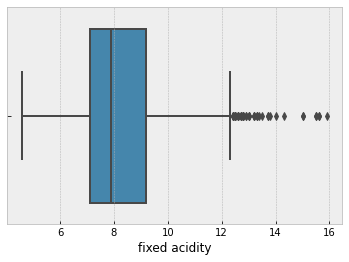

In [15]:
#To determine outliers for the column, fixed acidity.
fixed_acidity_box_plot = sns.boxplot(x = rdf['fixed acidity'])


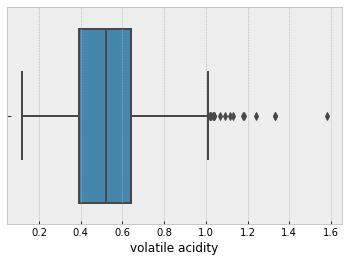

In [16]:
#To determine outliers for the column, volatile acidity.
voilatile_acidity_box_plot = sns.boxplot(x = rdf['volatile acidity'])

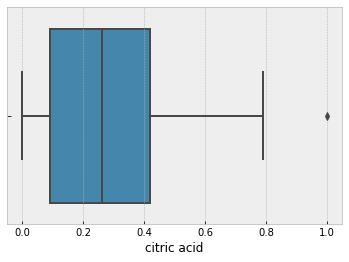

In [17]:
#To determine outliers for the column, citric acid.
citric_acid_box_plot = sns.boxplot(x = rdf['citric acid'])

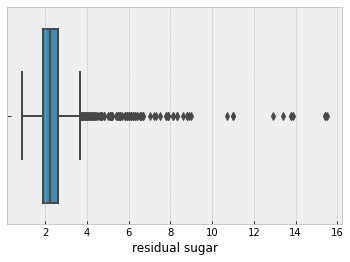

In [18]:
#To determine outliers for the column, residual sugar.
residual_sugar_box_plot = sns.boxplot(x = rdf['residual sugar'])

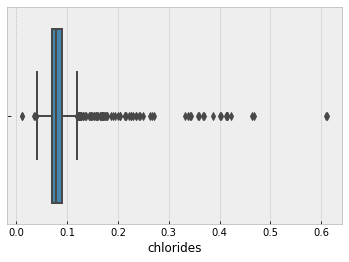

In [19]:
#To determine outliers for the column, chlorides.
chlorides_box_plot = sns.boxplot(x = rdf['chlorides'])

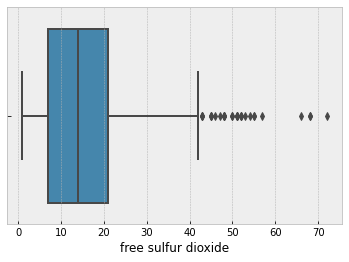

In [20]:
#To determine outliers for the column, free sulfur dioxide.
fixed_acidity_box_plot = sns.boxplot(x = rdf['free sulfur dioxide'])

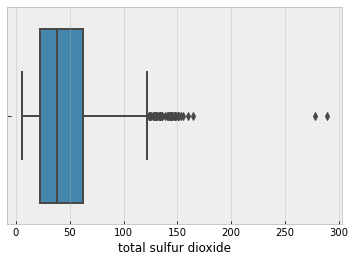

In [21]:
#To determine outliers for the column, total sulfur dioxide.
fixed_acidity_box_plot = sns.boxplot(x = rdf['total sulfur dioxide'])

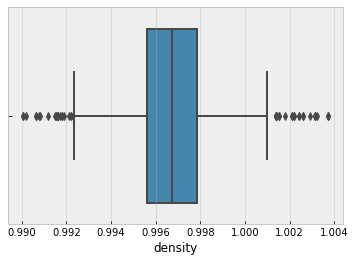

In [22]:
#To determine outliers for the column, density.
fixed_acidity_box_plot = sns.boxplot(x = rdf['density'])

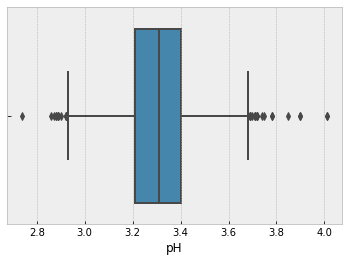

In [23]:
#To determine outliers for the column, pH.
fixed_acidity_box_plot = sns.boxplot(x = rdf['pH'])

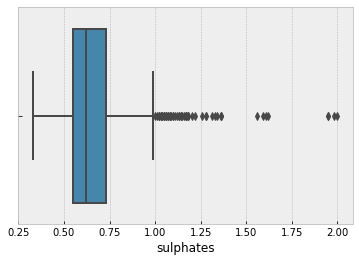

In [24]:
#To determine outliers for the column, sulphates.
fixed_acidity_box_plot = sns.boxplot(x = rdf['sulphates'])

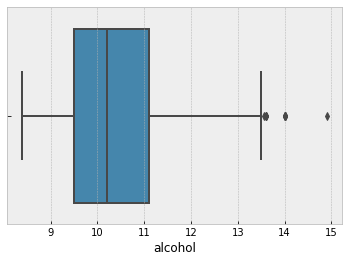

In [25]:
#To determine outliers for the column, alcohol.
fixed_acidity_box_plot = sns.boxplot(x = rdf['alcohol'])

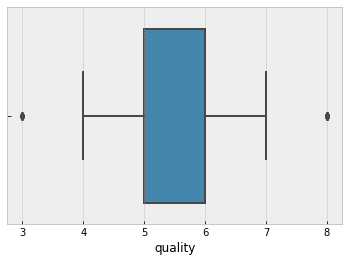

In [26]:
#To determine outliers for the column, quality.
ax = sns.boxplot(x = rdf['quality'])

In [27]:
#The function outlier_data_replace() will perform on the old dataset to manipulate outliers within the dataset
new_rdf = outlier_data_replace(rdf)

In [28]:
#To see if previous cell was performed and created new dataframe.
new_rdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.700,-0.405,1.9,0.076,11.0,34.0,0.99780,3.510,0.56,9.4,5.0
1,7.80,1.015,-0.405,2.6,0.098,25.0,67.0,0.99680,3.200,0.68,9.8,5.0
2,7.80,1.015,0.040,2.3,0.092,15.0,54.0,0.99700,3.260,0.65,9.8,5.0
3,12.35,0.015,0.915,1.9,0.075,17.0,60.0,0.99800,3.160,0.58,9.8,6.0
4,7.40,0.700,-0.405,1.9,0.076,11.0,34.0,0.99780,3.510,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,3.95,0.600,0.080,2.0,0.090,42.0,44.0,0.99490,3.450,0.58,10.5,5.0
1595,3.95,0.550,0.100,2.2,0.062,42.0,51.0,0.99512,3.685,0.76,11.2,6.0
1596,3.95,0.510,0.130,2.3,0.076,29.0,40.0,0.99574,3.420,0.75,11.0,6.0
1597,3.95,0.645,0.120,2.0,0.075,42.0,44.0,0.99547,3.685,0.71,10.2,5.0


In [29]:
rdf.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [30]:
#To see the detailed description of the newly created dataset.
new_rdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.169669,0.519872,0.267286,2.266698,0.080306,15.124765,42.347092,0.996731,3.309575,0.638211,10.324171,5.616948
std,2.079028,0.242442,0.313980,0.703820,0.020135,12.640805,39.678100,0.002236,0.186345,0.176585,1.505358,0.821957
min,3.950000,0.015000,-0.405000,0.850000,0.040000,-14.000000,-38.000000,0.992247,2.925000,0.280000,7.100000,3.500000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,7.500000


In [31]:
#To see the detailed description of the old dataset and compare the datset above
rdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Follwoing section will demonstrate before and after of dealing of outliers on each columns. 

Firstly, I will demonstrate column of dataset before dealing with outliers and then demonstrate the column after dealing with outliers.

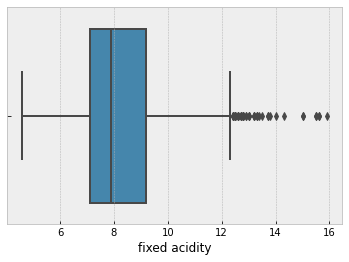

In [32]:
#To determine outliers for the column, fixed acidity.
fixed_acidity_box_plot = sns.boxplot(x = rdf['fixed acidity'])


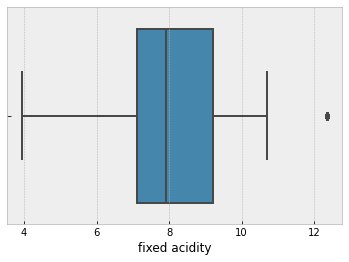

In [33]:
#To determine outliers for the column, fixed acidity.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['fixed acidity'])


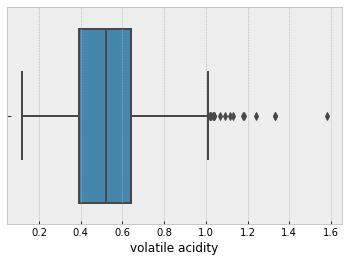

In [34]:
#To determine outliers for the column, volatile acidity.
voilatile_acidity_box_plot = sns.boxplot(x = rdf['volatile acidity'])

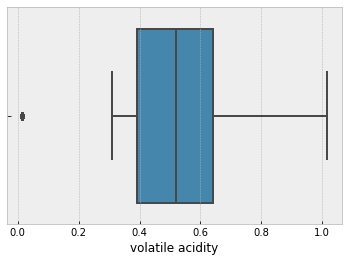

In [35]:
#To determine outliers for the column, volatile acidity.
voilatile_acidity_box_plot = sns.boxplot(x = new_rdf['volatile acidity'])

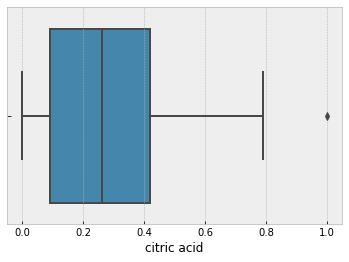

In [36]:
#To determine outliers for the column, citric acid.
citric_acid_box_plot = sns.boxplot(x = rdf['citric acid'])

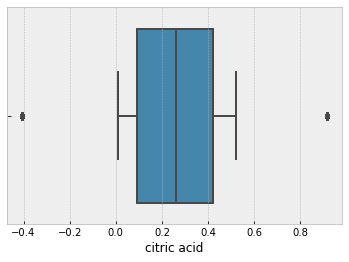

In [37]:
#To determine outliers for the column, citric acid.
citric_acid_box_plot = sns.boxplot(x = new_rdf['citric acid'])

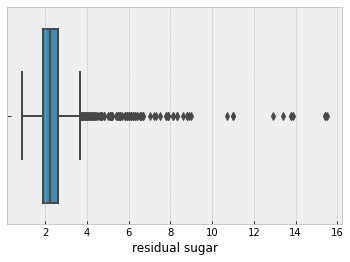

In [38]:
#To determine outliers for the column, residual sugar.
residual_sugar_box_plot = sns.boxplot(x = rdf['residual sugar'])

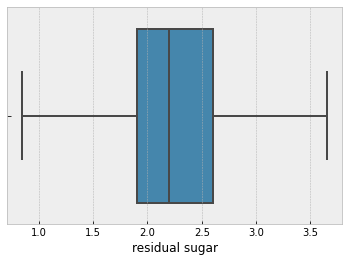

In [39]:
#To determine outliers for the column, residual sugar.
residual_sugar_box_plot = sns.boxplot(x = new_rdf['residual sugar'])

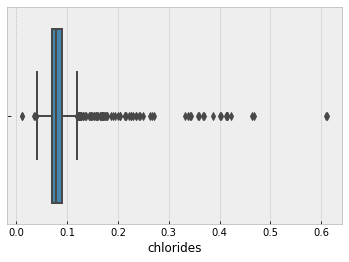

In [40]:
#To determine outliers for the column, chlorides.
chlorides_box_plot = sns.boxplot(x = rdf['chlorides'])

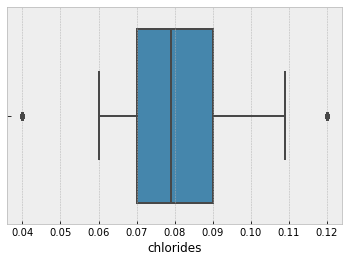

In [41]:
#To determine outliers for the column, chlorides.
chlorides_box_plot = sns.boxplot(x = new_rdf['chlorides'])

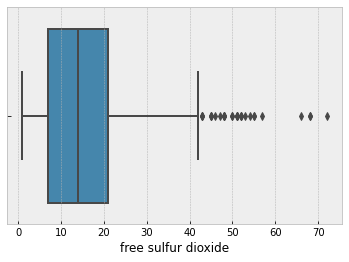

In [42]:
#To determine outliers for the column, free sulfur dioxide.
fixed_acidity_box_plot = sns.boxplot(x = rdf['free sulfur dioxide'])

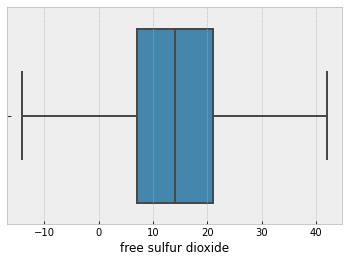

In [43]:
#To determine outliers for the column, free sulfur dioxide.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['free sulfur dioxide'])

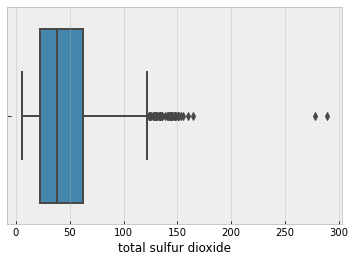

In [44]:
#To determine outliers for the column, total sulfur dioxide.
fixed_acidity_box_plot = sns.boxplot(x = rdf['total sulfur dioxide'])

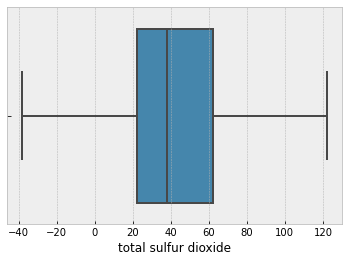

In [45]:
#To determine outliers for the column, total sulfur dioxide.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['total sulfur dioxide'])

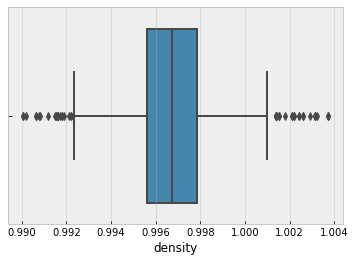

In [46]:
#To determine outliers for the column, density.
fixed_acidity_box_plot = sns.boxplot(x = rdf['density'])

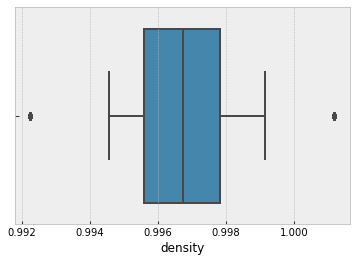

In [47]:
#To determine outliers for the column, density.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['density'])

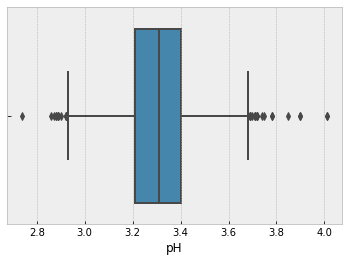

In [48]:
#To determine outliers for the column, pH.
fixed_acidity_box_plot = sns.boxplot(x = rdf['pH'])

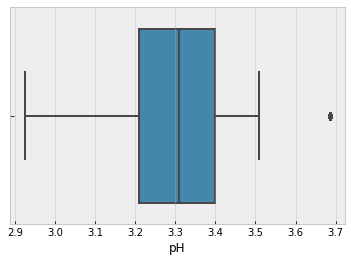

In [49]:
#To determine outliers for the column, pH.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['pH'])

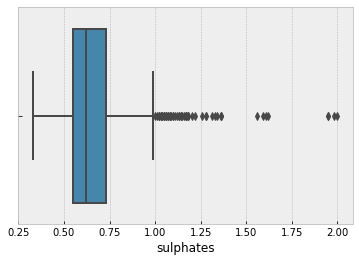

In [50]:
#To determine outliers for the column, sulphates.
fixed_acidity_box_plot = sns.boxplot(x = rdf['sulphates'])

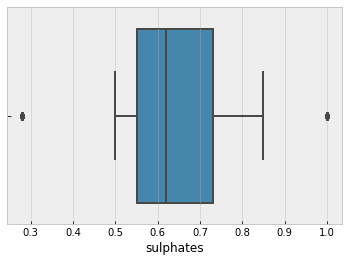

In [51]:
#To determine outliers for the column, sulphates.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['sulphates'])

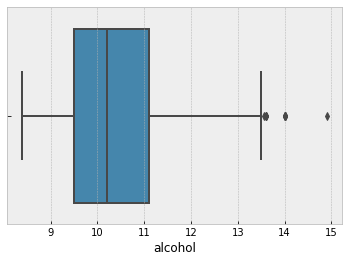

In [52]:
#To determine outliers for the column, alcohol.
fixed_acidity_box_plot = sns.boxplot(x = rdf['alcohol'])

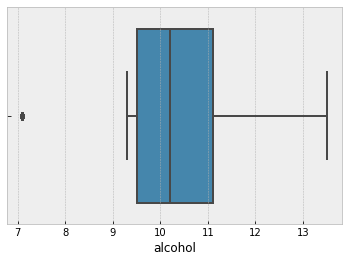

In [53]:
#To determine outliers for the column, alcohol.
fixed_acidity_box_plot = sns.boxplot(x = new_rdf['alcohol'])

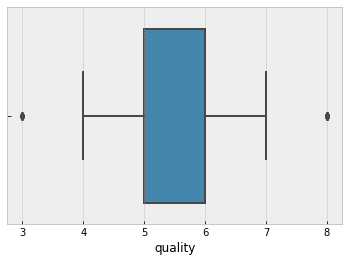

In [54]:
#To determine outliers for the column, quality.
ax = sns.boxplot(x = rdf['quality'])

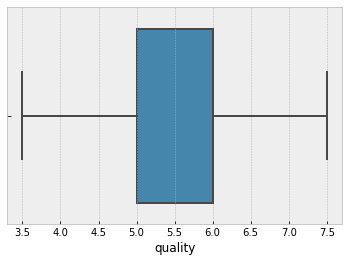

In [55]:
#To determine outliers for the column, quality.
ax = sns.boxplot(x = new_rdf['quality'])

There are some of columns still have outliers after dealing with outliers, that is because the dataset changed. Because of the change of the dataset, the shape and distribution of the dataset changed. However, the number of outliers and the range of outliers are not significant. Thus, I didn't remove them from the dataset. 

## Outlier detecting ends

## Implement Correlation heatmap

<AxesSubplot:>

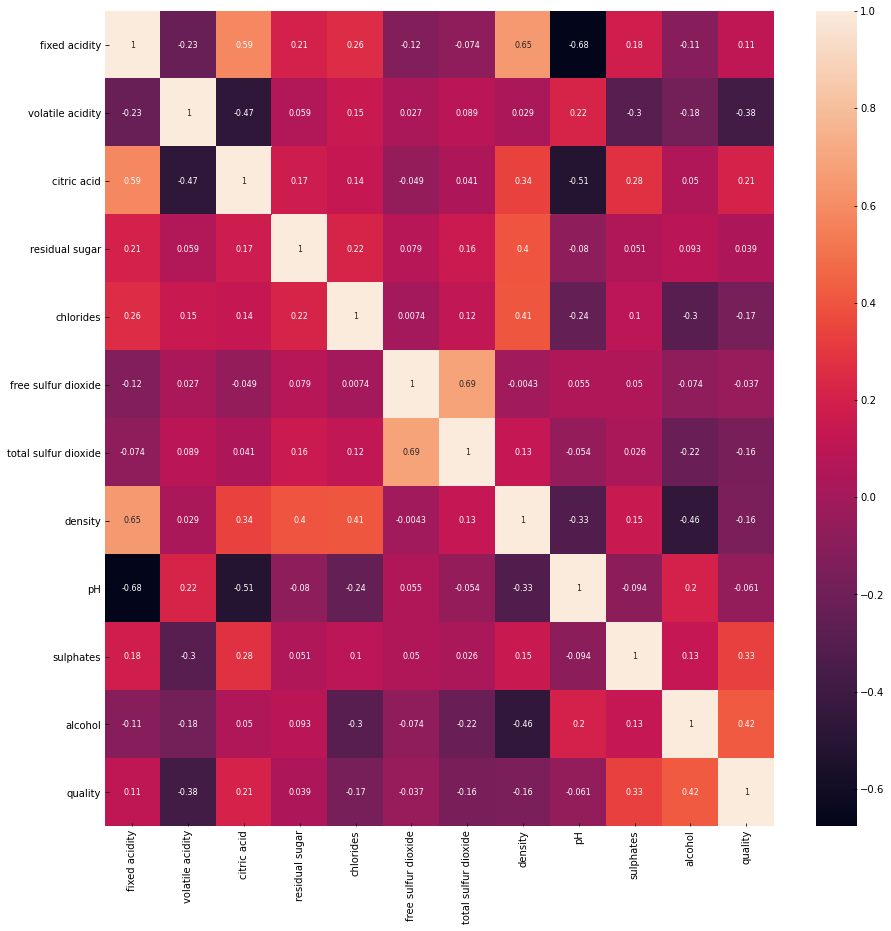

In [56]:
#This part is to see the heatmap.

correlation = new_rdf.corr()

plt.figure(figsize = (15,15))
sns.heatmap(correlation, cbar = True, annot = True, annot_kws = {'size':8})

In [57]:
# This is part to determine features of correlation on quality column.
# This is something to consider in the case where we need to reduce the column
# such as we have less computing power or fast computation is required.

# After seeing the heat map, I also want to see to see in bit more clear form how all attributes are
#correlated to the quality attribute 

abs(correlation).sort_values(ascending=False,by = 'quality')['quality']

#After this, you can see that pH, residual sugar, free sulfur dioxide have very low correlation 
#to quality attribute. Thus, we may do something in later part where in the preparartion of the dataset.



quality                 1.000000
alcohol                 0.421202
volatile acidity        0.377785
sulphates               0.328915
citric acid             0.212041
chlorides               0.166232
total sulfur dioxide    0.162489
density                 0.155765
fixed acidity           0.113227
pH                      0.061163
residual sugar          0.039053
free sulfur dioxide     0.036895
Name: quality, dtype: float64

## Check the distribution of data using histograms

In order to find proper number of bin, I wil use various factors in the each column.

I will use the following.

- n: number of instances
- Range: max value - min value
- \# of intervals = root(n)

Then, I can compute, width of intervals = Range / # of intervals.



### histogram with n such that proper number of bin that is computed above

In [58]:
#This part is to apply where we compute number of bins.

n_fixed_acidity = rdf.shape[0]
number_of__intervals = round(math.sqrt(n_fixed_acidity))

From this point on, I will display histogram with computed bin size.
After this, I will also display histogram with n = 10.

(array([146.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  54.,  74.,  88., 168.,  96.,  95.,  95.,  68.,  85.,  45.,
         51.,  67.,  55.,  55.,  31.,  24.,  49.,  29.,  32.,  26.,  10.,
          0.,   0.,   0.,   0.,   0.,   0., 156.]),
 array([ 3.95,  4.16,  4.37,  4.58,  4.79,  5.  ,  5.21,  5.42,  5.63,
         5.84,  6.05,  6.26,  6.47,  6.68,  6.89,  7.1 ,  7.31,  7.52,
         7.73,  7.94,  8.15,  8.36,  8.57,  8.78,  8.99,  9.2 ,  9.41,
         9.62,  9.83, 10.04, 10.25, 10.46, 10.67, 10.88, 11.09, 11.3 ,
        11.51, 11.72, 11.93, 12.14, 12.35]),
 <BarContainer object of 40 artists>)

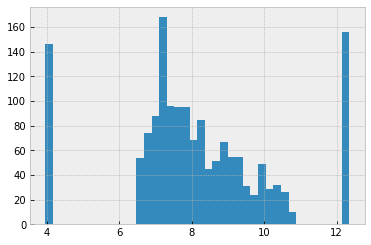

In [59]:
plt.hist(new_rdf['fixed acidity'], bins = number_of__intervals)

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         30.,  45.,  90.,  61., 107.,  77.,  76.,  47., 105.,  62.,  90.,
         73., 117.,  71.,  88.,  52.,  49.,  40.,  16.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 158.]),
 array([0.015, 0.04 , 0.065, 0.09 , 0.115, 0.14 , 0.165, 0.19 , 0.215,
        0.24 , 0.265, 0.29 , 0.315, 0.34 , 0.365, 0.39 , 0.415, 0.44 ,
        0.465, 0.49 , 0.515, 0.54 , 0.565, 0.59 , 0.615, 0.64 , 0.665,
        0.69 , 0.715, 0.74 , 0.765, 0.79 , 0.815, 0.84 , 0.865, 0.89 ,
        0.915, 0.94 , 0.965, 0.99 , 1.015]),
 <BarContainer object of 40 artists>)

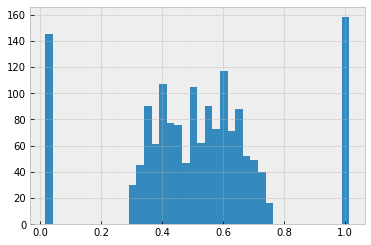

In [60]:
plt.hist(new_rdf['volatile acidity'], bins = number_of__intervals)

(array([132.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  83.,  79.,  79., 107.,  58.,  47., 106., 103.,  77., 113.,
         62.,  53., 102.,  60.,  60., 101.,  17.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([-0.405, -0.372, -0.339, -0.306, -0.273, -0.24 , -0.207, -0.174,
        -0.141, -0.108, -0.075, -0.042, -0.009,  0.024,  0.057,  0.09 ,
         0.123,  0.156,  0.189,  0.222,  0.255,  0.288,  0.321,  0.354,
         0.387,  0.42 ,  0.453,  0.486,  0.519,  0.552,  0.585,  0.618,
         0.651,  0.684,  0.717,  0.75 ,  0.783,  0.816,  0.849,  0.882,
         0.915]),
 <BarContainer object of 40 artists>)

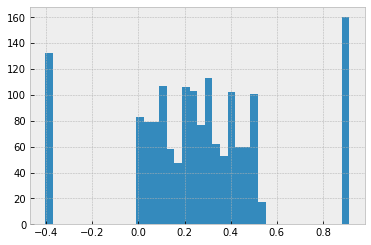

In [61]:
plt.hist(new_rdf['citric acid'], bins = number_of__intervals)

(array([132.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  83.,  79.,  79., 107.,  58.,  47., 106., 103.,  77., 113.,
         62.,  53., 102.,  60.,  60., 101.,  17.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([-0.405, -0.372, -0.339, -0.306, -0.273, -0.24 , -0.207, -0.174,
        -0.141, -0.108, -0.075, -0.042, -0.009,  0.024,  0.057,  0.09 ,
         0.123,  0.156,  0.189,  0.222,  0.255,  0.288,  0.321,  0.354,
         0.387,  0.42 ,  0.453,  0.486,  0.519,  0.552,  0.585,  0.618,
         0.651,  0.684,  0.717,  0.75 ,  0.783,  0.816,  0.849,  0.882,
         0.915]),
 <BarContainer object of 40 artists>)

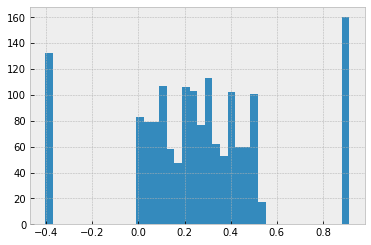

In [62]:
plt.hist(new_rdf['citric acid'], bins = number_of__intervals)

(array([140.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  78., 129.,   0., 117., 156., 130.,   2., 131., 110.,   1.,
         86.,  84.,   1.,  80.,  39.,  49.,   1.,  24.,  26.,   0.,   7.,
         15.,   0.,  11.,  15.,   3.,   0., 164.]),
 array([0.85, 0.92, 0.99, 1.06, 1.13, 1.2 , 1.27, 1.34, 1.41, 1.48, 1.55,
        1.62, 1.69, 1.76, 1.83, 1.9 , 1.97, 2.04, 2.11, 2.18, 2.25, 2.32,
        2.39, 2.46, 2.53, 2.6 , 2.67, 2.74, 2.81, 2.88, 2.95, 3.02, 3.09,
        3.16, 3.23, 3.3 , 3.37, 3.44, 3.51, 3.58, 3.65]),
 <BarContainer object of 40 artists>)

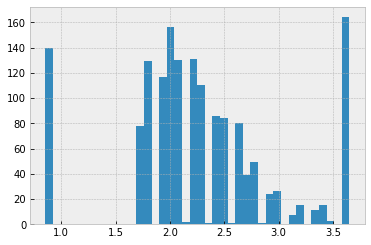

In [63]:
plt.hist(new_rdf['residual sugar'], bins = number_of__intervals)

(array([149.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  27.,
         46.,  43.,  59.,  51.,  82.,  59., 100.,  98.,  94., 106.,  81.,
         74.,  56.,  57.,  40.,  43.,  42.,  36.,  20.,  18.,  17.,  22.,
         17.,   4.,   0.,   0.,   0.,   0., 158.]),
 array([0.04 , 0.042, 0.044, 0.046, 0.048, 0.05 , 0.052, 0.054, 0.056,
        0.058, 0.06 , 0.062, 0.064, 0.066, 0.068, 0.07 , 0.072, 0.074,
        0.076, 0.078, 0.08 , 0.082, 0.084, 0.086, 0.088, 0.09 , 0.092,
        0.094, 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106, 0.108, 0.11 ,
        0.112, 0.114, 0.116, 0.118, 0.12 ]),
 <BarContainer object of 40 artists>)

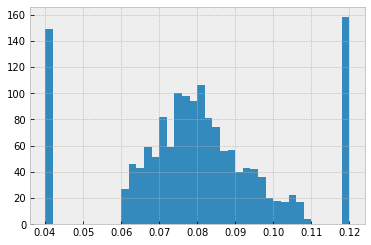

In [64]:
plt.hist(new_rdf['chlorides'], bins = number_of__intervals)

(array([ 94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 105., 138., 127.,  62., 138.,  75.,  57., 128.,  61.,
        106.,  39.,  30.,  63.,  32.,  58.,  32.,  29.,  46.,  16.,  20.,
          0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([-14. , -12.6, -11.2,  -9.8,  -8.4,  -7. ,  -5.6,  -4.2,  -2.8,
         -1.4,   0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,
         11.2,  12.6,  14. ,  15.4,  16.8,  18.2,  19.6,  21. ,  22.4,
         23.8,  25.2,  26.6,  28. ,  29.4,  30.8,  32.2,  33.6,  35. ,
         36.4,  37.8,  39.2,  40.6,  42. ]),
 <BarContainer object of 40 artists>)

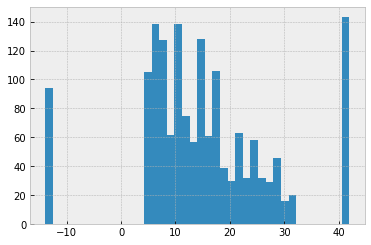

In [65]:
plt.hist(new_rdf['free sulfur dioxide'], bins = number_of__intervals)

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 121., 122., 122., 117.,  83.,  84.,  78.,  87.,  83.,
         51.,  49.,  50.,  49.,  39.,  32.,  26.,  19.,  21.,  39.,  22.,
          0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([-38., -34., -30., -26., -22., -18., -14., -10.,  -6.,  -2.,   2.,
          6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.,
         50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,  86.,  90.,
         94.,  98., 102., 106., 110., 114., 118., 122.]),
 <BarContainer object of 40 artists>)

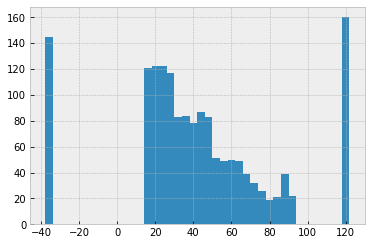

In [66]:
plt.hist(new_rdf['total sulfur dioxide'], bins = number_of__intervals)

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 121., 122., 122., 117.,  83.,  84.,  78.,  87.,  83.,
         51.,  49.,  50.,  49.,  39.,  32.,  26.,  19.,  21.,  39.,  22.,
          0.,   0.,   0.,   0.,   0.,   0., 160.]),
 array([-38., -34., -30., -26., -22., -18., -14., -10.,  -6.,  -2.,   2.,
          6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.,
         50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,  86.,  90.,
         94.,  98., 102., 106., 110., 114., 118., 122.]),
 <BarContainer object of 40 artists>)

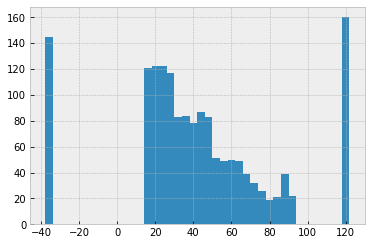

In [67]:
plt.hist(new_rdf['total sulfur dioxide'], bins = number_of__intervals)

(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.,
         42.,  44.,  54.,  69.,  79.,  62.,  89.,  83.,  85., 102.,  68.,
         95.,  95.,  48.,  63.,  50.,  39.,  39.,  28.,  22.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 159.]),
 array([0.9922475, 0.992471 , 0.9926945, 0.992918 , 0.9931415, 0.993365 ,
        0.9935885, 0.993812 , 0.9940355, 0.994259 , 0.9944825, 0.994706 ,
        0.9949295, 0.995153 , 0.9953765, 0.9956   , 0.9958235, 0.996047 ,
        0.9962705, 0.996494 , 0.9967175, 0.996941 , 0.9971645, 0.997388 ,
        0.9976115, 0.997835 , 0.9980585, 0.998282 , 0.9985055, 0.998729 ,
        0.9989525, 0.999176 , 0.9993995, 0.999623 , 0.9998465, 1.00007  ,
        1.0002935, 1.000517 , 1.0007405, 1.000964 , 1.0011875]),
 <BarContainer object of 40 artists>)

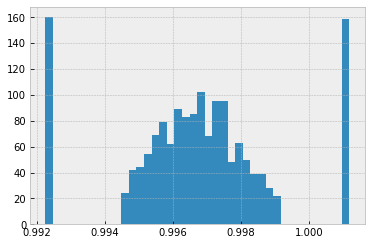

In [68]:
plt.hist(new_rdf['density'], bins = number_of__intervals)

(array([143.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  33.,
         55.,  63.,  55.,  39.,  75.,  61.,  79.,  77., 103.,  84.,  80.,
         95.,  85.,  48.,  71.,  50.,  49.,  43.,  29.,  29.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 153.]),
 array([2.925, 2.944, 2.963, 2.982, 3.001, 3.02 , 3.039, 3.058, 3.077,
        3.096, 3.115, 3.134, 3.153, 3.172, 3.191, 3.21 , 3.229, 3.248,
        3.267, 3.286, 3.305, 3.324, 3.343, 3.362, 3.381, 3.4  , 3.419,
        3.438, 3.457, 3.476, 3.495, 3.514, 3.533, 3.552, 3.571, 3.59 ,
        3.609, 3.628, 3.647, 3.666, 3.685]),
 <BarContainer object of 40 artists>)

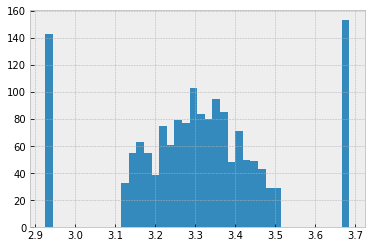

In [69]:
plt.hist(new_rdf['pH'], bins = number_of__intervals)

(array([151.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  53.,  98.,  68., 110., 123., 120., 106.,  48.,  87.,  78.,
         58.,  59.,  28.,  52.,  45.,  49.,  37.,  15.,  37.,  27.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 150.]),
 array([0.28 , 0.298, 0.316, 0.334, 0.352, 0.37 , 0.388, 0.406, 0.424,
        0.442, 0.46 , 0.478, 0.496, 0.514, 0.532, 0.55 , 0.568, 0.586,
        0.604, 0.622, 0.64 , 0.658, 0.676, 0.694, 0.712, 0.73 , 0.748,
        0.766, 0.784, 0.802, 0.82 , 0.838, 0.856, 0.874, 0.892, 0.91 ,
        0.928, 0.946, 0.964, 0.982, 1.   ]),
 <BarContainer object of 40 artists>)

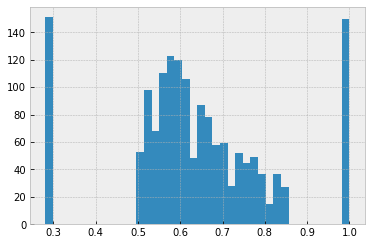

In [70]:
plt.hist(new_rdf['sulphates'], bins = number_of__intervals)

(array([135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  59., 103., 201., 132.,  50., 116.,  46.,  74.,  97.,
         28.,  91.,  60.,  63.,  64.,  30.,  38.,  29.,  42.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 141.]),
 array([ 7.1 ,  7.26,  7.42,  7.58,  7.74,  7.9 ,  8.06,  8.22,  8.38,
         8.54,  8.7 ,  8.86,  9.02,  9.18,  9.34,  9.5 ,  9.66,  9.82,
         9.98, 10.14, 10.3 , 10.46, 10.62, 10.78, 10.94, 11.1 , 11.26,
        11.42, 11.58, 11.74, 11.9 , 12.06, 12.22, 12.38, 12.54, 12.7 ,
        12.86, 13.02, 13.18, 13.34, 13.5 ]),
 <BarContainer object of 40 artists>)

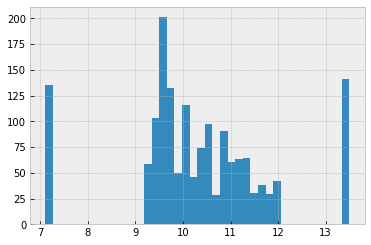

In [71]:
plt.hist(new_rdf['alcohol'], bins = number_of__intervals)

(array([ 63.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 681.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 638.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 199.,   0.,   0.,   0.,  18.]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
        4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ,
        6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
        7.4, 7.5]),
 <BarContainer object of 40 artists>)

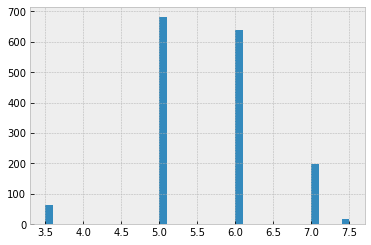

In [72]:
plt.hist(new_rdf['quality'], bins = number_of__intervals)

Untill this point, I displayed computed bin size.
From this point, I will display n = 10.


### histogram with n = 10

(array([146.,   0.,   0., 384., 354., 248., 165., 136.,  10., 156.]),
 array([ 3.95,  4.79,  5.63,  6.47,  7.31,  8.15,  8.99,  9.83, 10.67,
        11.51, 12.35]),
 <BarContainer object of 10 artists>)

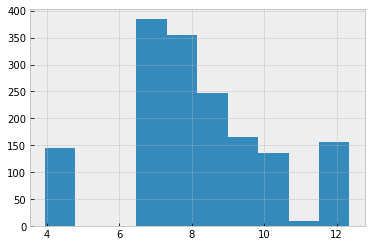

In [73]:
plt.hist(new_rdf['fixed acidity'], bins = 10)

(array([145.,   0.,  30., 303., 305., 342., 260.,  56.,   0., 158.]),
 array([0.015, 0.115, 0.215, 0.315, 0.415, 0.515, 0.615, 0.715, 0.815,
        0.915, 1.015]),
 <BarContainer object of 10 artists>)

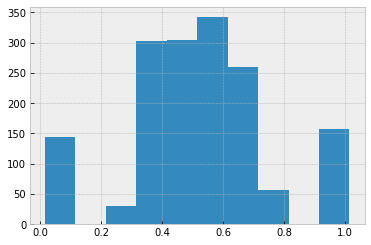

In [74]:
plt.hist(new_rdf['volatile acidity'], bins = 10)

(array([132.,   0.,   0., 348., 314., 305., 323.,  17.,   0., 160.]),
 array([-0.405, -0.273, -0.141, -0.009,  0.123,  0.255,  0.387,  0.519,
         0.651,  0.783,  0.915]),
 <BarContainer object of 10 artists>)

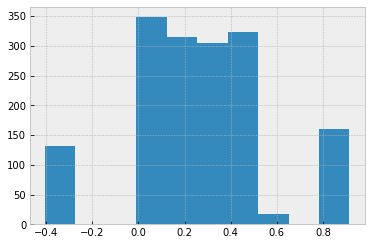

In [75]:
plt.hist(new_rdf['citric acid'], bins = 10)

(array([132.,   0.,   0., 348., 314., 305., 323.,  17.,   0., 160.]),
 array([-0.405, -0.273, -0.141, -0.009,  0.123,  0.255,  0.387,  0.519,
         0.651,  0.783,  0.915]),
 <BarContainer object of 10 artists>)

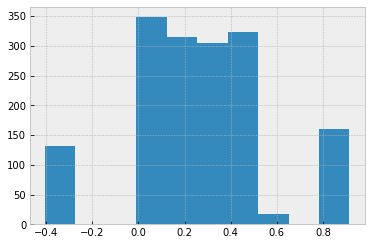

In [76]:
plt.hist(new_rdf['citric acid'], bins = 10)

(array([140.,   0.,   0., 324., 419., 281., 169.,  51.,  33., 182.]),
 array([0.85, 1.13, 1.41, 1.69, 1.97, 2.25, 2.53, 2.81, 3.09, 3.37, 3.65]),
 <BarContainer object of 10 artists>)

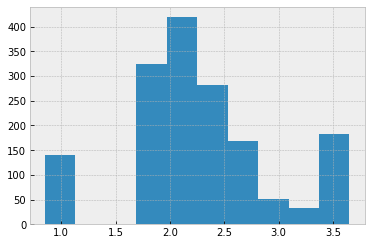

In [77]:
plt.hist(new_rdf['residual sugar'], bins = 10)

(array([149.,   0.,  73., 235., 351., 317., 182.,  91.,  43., 158.]),
 array([0.04 , 0.048, 0.056, 0.064, 0.072, 0.08 , 0.088, 0.096, 0.104,
        0.112, 0.12 ]),
 <BarContainer object of 10 artists>)

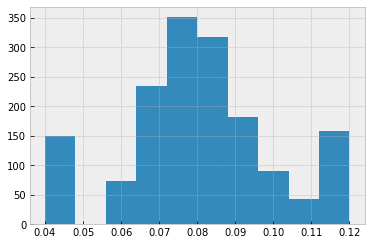

In [78]:
plt.hist(new_rdf['chlorides'], bins = 10)

(array([ 94.,   0.,   0., 370., 332., 334., 183., 123.,  20., 143.]),
 array([-14. ,  -8.4,  -2.8,   2.8,   8.4,  14. ,  19.6,  25.2,  30.8,
         36.4,  42. ]),
 <BarContainer object of 10 artists>)

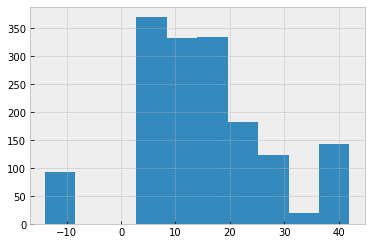

In [79]:
plt.hist(new_rdf['free sulfur dioxide'], bins = 10)

(array([145.,   0.,   0., 365., 362., 270., 170., 105.,  22., 160.]),
 array([-38., -22.,  -6.,  10.,  26.,  42.,  58.,  74.,  90., 106., 122.]),
 <BarContainer object of 10 artists>)

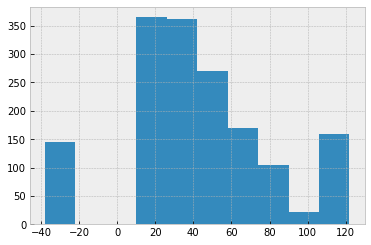

In [80]:
plt.hist(new_rdf['total sulfur dioxide'], bins = 10)

(array([145.,   0.,   0., 365., 362., 270., 170., 105.,  22., 160.]),
 array([-38., -22.,  -6.,  10.,  26.,  42.,  58.,  74.,  90., 106., 122.]),
 <BarContainer object of 10 artists>)

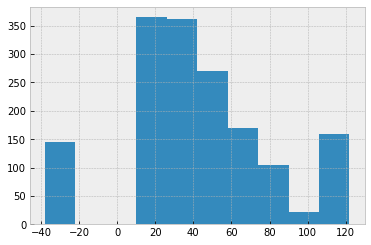

In [81]:
plt.hist(new_rdf['total sulfur dioxide'], bins = 10)

(array([160.,   0.,  66., 246., 319., 360., 200.,  89.,   0., 159.]),
 array([0.9922475, 0.9931415, 0.9940355, 0.9949295, 0.9958235, 0.9967175,
        0.9976115, 0.9985055, 0.9993995, 1.0002935, 1.0011875]),
 <BarContainer object of 10 artists>)

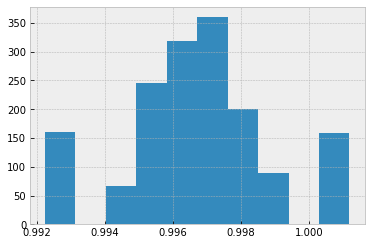

In [82]:
plt.hist(new_rdf['density'], bins = 10)

(array([143.,   0.,  88., 232., 320., 344., 218., 101.,   0., 153.]),
 array([2.925, 3.001, 3.077, 3.153, 3.229, 3.305, 3.381, 3.457, 3.533,
        3.609, 3.685]),
 <BarContainer object of 10 artists>)

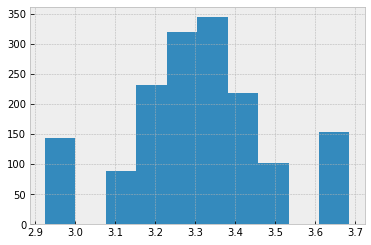

In [83]:
plt.hist(new_rdf['pH'], bins = 10)

(array([151.,   0.,   0., 329., 397., 282., 174., 116.,   0., 150.]),
 array([0.28 , 0.352, 0.424, 0.496, 0.568, 0.64 , 0.712, 0.784, 0.856,
        0.928, 1.   ]),
 <BarContainer object of 10 artists>)

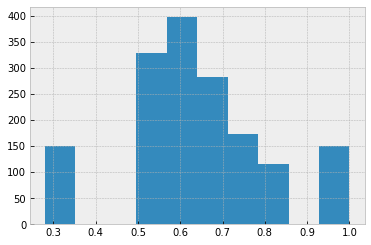

In [84]:
plt.hist(new_rdf['sulphates'], bins = 10)

(array([135.,   0.,   0., 363., 344., 290., 217., 109.,   0., 141.]),
 array([ 7.1 ,  7.74,  8.38,  9.02,  9.66, 10.3 , 10.94, 11.58, 12.22,
        12.86, 13.5 ]),
 <BarContainer object of 10 artists>)

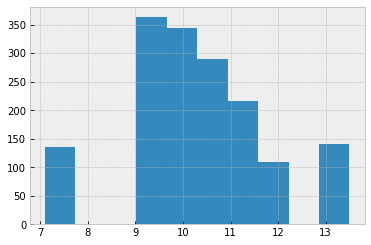

In [85]:
plt.hist(new_rdf['alcohol'], bins = 10)

(array([ 63.,   0.,   0., 681.,   0.,   0., 638.,   0., 199.,  18.]),
 array([3.5, 3.9, 4.3, 4.7, 5.1, 5.5, 5.9, 6.3, 6.7, 7.1, 7.5]),
 <BarContainer object of 10 artists>)

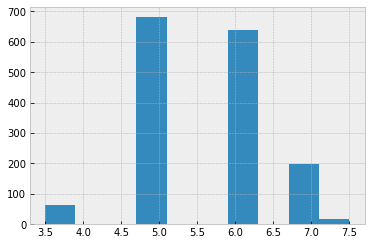

In [86]:
plt.hist(new_rdf['quality'], bins = 10)

## Prepare the data for modeling by carrying out any steps that you think are necessary

### Separate the data into Feature and Labels

In [87]:
#This part is separate features and labels.

features = new_rdf.drop('quality', axis = 1)
labels = new_rdf['quality']

### Feature scaling

In [88]:
#Using StandaScaler() to scaler the dataset for better performance
standardScaler = StandardScaler()
standard_Scaled_Feature_Data = standardScaler.fit_transform(features)


In [89]:
#This part is create dataframe based on our scaled dataset.
standard_Scaled_Feature_Data_df = pd.DataFrame(standard_Scaled_Feature_Data,  columns = features.columns)


In [90]:
#To see if previous cell is property performed

standard_Scaled_Feature_Data_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.370322,0.743208,-2.141843,-0.521174,-0.213947,-0.326408,-0.210436,0.478278,1.075894,-0.443048,-0.614113
1,-0.177864,2.042896,-2.141843,0.473710,0.879028,0.781463,0.621517,0.030847,-0.588204,0.236722,-0.348313
2,-0.177864,2.042896,-0.724112,0.047331,0.580944,-0.009873,0.293778,0.120333,-0.266120,0.066780,-0.348313
3,2.011344,-2.083098,2.063560,-0.521174,-0.263628,0.148394,0.445042,0.567764,-0.802926,-0.329753,-0.348313
4,-0.370322,0.743208,-2.141843,-0.521174,-0.213947,-0.326408,-0.210436,0.478278,1.075894,-0.443048,-0.614113
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.030271,0.330609,-0.596676,-0.379048,0.481583,2.126735,0.041671,-0.819273,0.753811,-0.329753,0.116838
1595,-2.030271,0.124309,-0.532958,-0.094795,-0.909477,2.126735,0.218146,-0.720838,2.015305,0.689903,0.581990
1596,-2.030271,-0.040731,-0.437380,0.047331,-0.213947,1.097998,-0.059172,-0.443431,0.592769,0.633255,0.449089
1597,-2.030271,0.516278,-0.469239,-0.379048,-0.263628,2.126735,0.041671,-0.564237,2.015305,0.406665,-0.082512


In [91]:
#This is to see if there are any null values.

standard_Scaled_Feature_Data_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [92]:
scaled_features = standard_Scaled_Feature_Data_df

### Dataset separation

This part is to separate the dataset into 60-20-20

In [93]:
X_train,X_test,y_train, y_test = train_test_split(scaled_features, labels, 
                                                   test_size = 0.4,
                                                   random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
                                                test_size = 0.5,
                                               random_state = 42)

# Modeling

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

## Implement of 3 Regression algorithms

Although it is only required to address 2 Regression algorithms, I implemented 3.

In regression algorithms, I will perform 

 i) Decision Tree Regressor
 ii) Linear Regressor
 iii) Random Forest Regressor
 
 
 After this, we will deploy nueral network with Tensorflow and Keras to classify wine quaility.

### Decision Tree Regressor

In [94]:
#To build a Decision tree regressor model

decision_tree_reg = DecisionTreeRegressor(random_state = 42)

In [95]:
#To have parameters for decision tree regressor

DTR_parameters  = {
    'n_estimators' : [5,50,250],
    'max_depth' : [2,4,8,16,21,None],
    'min_sample_split' : [1,2,3,4]
}

In [96]:
#To seacrh the best parameter
beg_DTR_GridSrachCV = time()
DTR_CV = GridSearchCV(decision_tree_reg, DTR_parameters, cv = 5)
end_DTR_GridSrachCV = time()

latency_GridSearch_DTR = round(((end_DTR_GridSrachCV - beg_DTR_GridSrachCV)*1000),3)
print(latency_GridSearch_DTR)


0.09


In [97]:
#train the model with training dataset
beg_DTR_fit = time()
DTR_CV = decision_tree_reg .fit(X_train, y_train.values.ravel())
end_DTR_fit = time()

#measure the latency of training the model
latency_fit_DTR = round(((end_DTR_fit - beg_DTR_fit)),3)
print(latency_fit_DTR)


0.009


### Linear regressor

In [98]:
#To build a Linear regressor model

linear_reg = linear_model.LinearRegression()

In [99]:
#To train the model with training dataset

beg_LR_fit = time()
linear_reg.fit(X_train,y_train)
end_LR_fit = time()

latency_fit_LR = round(((end_LR_fit - beg_LR_fit)),3)
print(latency_fit_LR)

0.009


### Random Forest Regressor

In [100]:
#To build a Random Forest regressor model
random_forest_reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [101]:
#To train the model with training dataset

beg_RFR_fit = time()
random_forest_reg.fit(X_train,y_train)
end_RFR_fit = time()

latency_fit_RFR = round(((end_RFR_fit - beg_RFR_fit)),3)
print(latency_fit_RFR)

3.998


## Tensorflow and Keras implementation

In [102]:
features_tf = new_rdf.drop('quality', axis = 1).values
labels_tf = new_rdf['quality'].values

In [103]:
le = LabelEncoder()
labels_tf = le.fit_transform(labels_tf)

In [104]:
#This is to separate the dataset into 80-20 to train and test the model.

X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(features_tf, labels_tf, test_size=0.2, random_state=42)

y_train_ts_class = to_categorical(y_train_ts, 6)
y_test_ts_class = to_categorical(y_test_ts, 6)


In [105]:
#This is to scale the dataset

scaler = StandardScaler()

X_train_ts = scaler.fit_transform(X_train_ts)
X_test_ts = scaler.transform(X_test_ts)

print(X_train_ts.shape)
print(X_test_ts.shape)

(1279, 11)
(320, 11)


In [106]:
#This part is to build a model

xavier_init = tf.keras.initializers.GlorotNormal(seed = 1)

model = Sequential()
model.add(Dense(64, kernel_initializer=xavier_init,  activation='relu'))
model.add(Dense(32, kernel_initializer=xavier_init, activation='relu'))
model.add(Dense(16, kernel_initializer=xavier_init, activation='relu'))
model.add(Dense(6, kernel_initializer=xavier_init, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

In [107]:
#This is to train the model with the training dataset

model_fit = model.fit(X_train_ts,
          y_train_ts_class,
          epochs=500,
          validation_data=(X_test_ts,y_test_ts_class),
          verbose=1)

Epoch 1/500
40/40 [==============================] - 2s 20ms/step - loss: 1.5724 - accuracy: 0.6512 - precision: 0.2976 - recall: 0.8031 - val_loss: 1.2534 - val_accuracy: 0.6729 - val_precision: 0.3197 - val_recall: 0.8531
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 1.1665 - accuracy: 0.6943 - precision: 0.3360 - recall: 0.8504 - val_loss: 1.0943 - val_accuracy: 0.7307 - val_precision: 0.3752 - val_recall: 0.9250
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 1.0107 - accuracy: 0.7166 - precision: 0.3647 - recall: 0.9438 - val_loss: 1.0261 - val_accuracy: 0.7005 - val_precision: 0.3546 - val_recall: 0.9719
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 0.9707 - accuracy: 0.6875 - precision: 0.3438 - recall: 0.9628 - val_loss: 0.9957 - val_accuracy: 0.6948 - val_precision: 0.3502 - val_recall: 0.9719
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 0.9211 - accuracy: 0.6973 - precis

Epoch 38/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7334 - precision: 0.3818 - recall: 0.9683 - val_loss: 0.9036 - val_accuracy: 0.7391 - val_precision: 0.3867 - val_recall: 0.9656
Epoch 39/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7394 - precision: 0.3876 - recall: 0.9719 - val_loss: 0.9179 - val_accuracy: 0.7375 - val_precision: 0.3853 - val_recall: 0.9656
Epoch 40/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.7298 - precision: 0.3792 - recall: 0.9747 - val_loss: 0.9236 - val_accuracy: 0.7286 - val_precision: 0.3773 - val_recall: 0.9656
Epoch 41/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.7348 - precision: 0.3836 - recall: 0.9733 - val_loss: 0.9245 - val_accuracy: 0.7354 - val_precision: 0.3825 - val_recall: 0.9563
Epoch 42/500
40/40 [==============================] - 0s 2ms/step - loss: 0.6636 - accuracy: 0.7444 - pr

40/40 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.7567 - precision: 0.4057 - recall: 0.9879 - val_loss: 1.0531 - val_accuracy: 0.7479 - val_precision: 0.3935 - val_recall: 0.9469
Epoch 75/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7600 - precision: 0.4087 - recall: 0.9840 - val_loss: 1.0312 - val_accuracy: 0.7396 - val_precision: 0.3866 - val_recall: 0.9594
Epoch 76/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7478 - precision: 0.3967 - recall: 0.9849 - val_loss: 1.0609 - val_accuracy: 0.7453 - val_precision: 0.3912 - val_recall: 0.9500
Epoch 77/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7592 - precision: 0.4084 - recall: 0.9921 - val_loss: 1.0487 - val_accuracy: 0.7490 - val_precision: 0.3940 - val_recall: 0.9406
Epoch 78/500
40/40 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7554 - precision: 0.40

40/40 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.7679 - precision: 0.4177 - recall: 0.9956 - val_loss: 1.2829 - val_accuracy: 0.7542 - val_precision: 0.3978 - val_recall: 0.9250
Epoch 111/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.7753 - precision: 0.4256 - recall: 0.9947 - val_loss: 1.2721 - val_accuracy: 0.7536 - val_precision: 0.3973 - val_recall: 0.9250
Epoch 112/500
40/40 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.7686 - precision: 0.4183 - recall: 0.9932 - val_loss: 1.2982 - val_accuracy: 0.7536 - val_precision: 0.3976 - val_recall: 0.9281
Epoch 113/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.7703 - precision: 0.4197 - recall: 0.9875 - val_loss: 1.2818 - val_accuracy: 0.7500 - val_precision: 0.3933 - val_recall: 0.9219
Epoch 114/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.7714 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.7829 - precision: 0.4342 - recall: 0.9979 - val_loss: 1.5460 - val_accuracy: 0.7651 - val_precision: 0.4097 - val_recall: 0.9281
Epoch 147/500
40/40 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.7841 - precision: 0.4357 - recall: 0.9994 - val_loss: 1.5910 - val_accuracy: 0.7635 - val_precision: 0.4085 - val_recall: 0.9344
Epoch 148/500
40/40 [==============================] - 0s 2ms/step - loss: 0.1708 - accuracy: 0.7914 - precision: 0.4441 - recall: 0.9990 - val_loss: 1.6014 - val_accuracy: 0.7604 - val_precision: 0.4044 - val_recall: 0.9250
Epoch 149/500
40/40 [==============================] - 0s 2ms/step - loss: 0.1821 - accuracy: 0.7984 - precision: 0.4526 - recall: 0.9988 - val_loss: 1.5615 - val_accuracy: 0.7583 - val_precision: 0.4030 - val_recall: 0.9344
Epoch 150/500
40/40 [==============================] - 0s 2ms/step - loss: 0.1724 - accuracy: 0.7835 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.8018 - precision: 0.4568 - recall: 0.9992 - val_loss: 1.8509 - val_accuracy: 0.7656 - val_precision: 0.4087 - val_recall: 0.9094
Epoch 183/500
40/40 [==============================] - 0s 2ms/step - loss: 0.1027 - accuracy: 0.7970 - precision: 0.4509 - recall: 0.9999 - val_loss: 1.9215 - val_accuracy: 0.7745 - val_precision: 0.4189 - val_recall: 0.9125
Epoch 184/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.8038 - precision: 0.4592 - recall: 0.9975 - val_loss: 1.9227 - val_accuracy: 0.7693 - val_precision: 0.4123 - val_recall: 0.9031
Epoch 185/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.8049 - precision: 0.4608 - recall: 0.9997 - val_loss: 1.9125 - val_accuracy: 0.7724 - val_precision: 0.4170 - val_recall: 0.9187
Epoch 186/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.8011 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.8212 - precision: 0.4829 - recall: 0.9999 - val_loss: 2.2944 - val_accuracy: 0.7766 - val_precision: 0.4193 - val_recall: 0.8844
Epoch 219/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.8166 - precision: 0.4762 - recall: 1.0000 - val_loss: 2.2069 - val_accuracy: 0.7776 - val_precision: 0.4214 - val_recall: 0.8969
Epoch 220/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.8240 - precision: 0.4866 - recall: 0.9989 - val_loss: 2.2950 - val_accuracy: 0.7786 - val_precision: 0.4222 - val_recall: 0.8906
Epoch 221/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.8199 - precision: 0.4806 - recall: 0.9981 - val_loss: 2.2904 - val_accuracy: 0.7781 - val_precision: 0.4223 - val_recall: 0.9000
Epoch 222/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.8110 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.8311 - precision: 0.4967 - recall: 1.0000 - val_loss: 2.5917 - val_accuracy: 0.7901 - val_precision: 0.4361 - val_recall: 0.8844
Epoch 255/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.8321 - precision: 0.4982 - recall: 1.0000 - val_loss: 2.6243 - val_accuracy: 0.7839 - val_precision: 0.4281 - val_recall: 0.8844
Epoch 256/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.8212 - precision: 0.4824 - recall: 1.0000 - val_loss: 2.6853 - val_accuracy: 0.7906 - val_precision: 0.4367 - val_recall: 0.8844
Epoch 257/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.8320 - precision: 0.4981 - recall: 1.0000 - val_loss: 2.7304 - val_accuracy: 0.7854 - val_precision: 0.4301 - val_recall: 0.8844
Epoch 258/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.8243 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.8374 - precision: 0.5062 - recall: 1.0000 - val_loss: 2.9105 - val_accuracy: 0.7964 - val_precision: 0.4443 - val_recall: 0.8844
Epoch 291/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.8291 - precision: 0.4938 - recall: 0.9991 - val_loss: 2.9356 - val_accuracy: 0.7891 - val_precision: 0.4345 - val_recall: 0.8813
Epoch 292/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.8392 - precision: 0.5092 - recall: 1.0000 - val_loss: 2.8766 - val_accuracy: 0.7901 - val_precision: 0.4357 - val_recall: 0.8781
Epoch 293/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.8293 - precision: 0.4942 - recall: 1.0000 - val_loss: 2.9549 - val_accuracy: 0.7974 - val_precision: 0.4457 - val_recall: 0.8844
Epoch 294/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.8379 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.8467 - precision: 0.5210 - recall: 1.0000 - val_loss: 3.1884 - val_accuracy: 0.7953 - val_precision: 0.4427 - val_recall: 0.8813
Epoch 327/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.8408 - precision: 0.5114 - recall: 1.0000 - val_loss: 3.1357 - val_accuracy: 0.7932 - val_precision: 0.4394 - val_recall: 0.8719
Epoch 328/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.8448 - precision: 0.5180 - recall: 1.0000 - val_loss: 3.1364 - val_accuracy: 0.7932 - val_precision: 0.4394 - val_recall: 0.8719
Epoch 329/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.8407 - precision: 0.5113 - recall: 1.0000 - val_loss: 3.1706 - val_accuracy: 0.7937 - val_precision: 0.4399 - val_recall: 0.8687
Epoch 330/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.8442 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.8441 - precision: 0.5167 - recall: 1.0000 - val_loss: 3.3033 - val_accuracy: 0.7937 - val_precision: 0.4395 - val_recall: 0.8625
Epoch 363/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.8442 - precision: 0.5168 - recall: 0.9997 - val_loss: 3.3137 - val_accuracy: 0.7995 - val_precision: 0.4480 - val_recall: 0.8750
Epoch 364/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.8399 - precision: 0.5102 - recall: 0.9975 - val_loss: 3.3693 - val_accuracy: 0.7932 - val_precision: 0.4392 - val_recall: 0.8687
Epoch 365/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.8376 - precision: 0.5065 - recall: 0.9990 - val_loss: 3.3852 - val_accuracy: 0.7964 - val_precision: 0.4434 - val_recall: 0.8687
Epoch 366/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.8408 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.8420 - precision: 0.5135 - recall: 1.0000 - val_loss: 3.5628 - val_accuracy: 0.8021 - val_precision: 0.4511 - val_recall: 0.8656
Epoch 399/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.8409 - precision: 0.5117 - recall: 1.0000 - val_loss: 3.5065 - val_accuracy: 0.7964 - val_precision: 0.4436 - val_recall: 0.8719
Epoch 400/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.8448 - precision: 0.5179 - recall: 1.0000 - val_loss: 3.5488 - val_accuracy: 0.8036 - val_precision: 0.4534 - val_recall: 0.8656
Epoch 401/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.8447 - precision: 0.5177 - recall: 1.0000 - val_loss: 3.5359 - val_accuracy: 0.7969 - val_precision: 0.4443 - val_recall: 0.8719
Epoch 402/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.8458 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.8448 - precision: 0.5180 - recall: 1.0000 - val_loss: 3.6703 - val_accuracy: 0.8047 - val_precision: 0.4553 - val_recall: 0.8750
Epoch 435/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.8472 - precision: 0.5217 - recall: 1.0000 - val_loss: 3.6231 - val_accuracy: 0.7984 - val_precision: 0.4457 - val_recall: 0.8594
Epoch 436/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.8460 - precision: 0.5199 - recall: 1.0000 - val_loss: 3.6339 - val_accuracy: 0.8047 - val_precision: 0.4550 - val_recall: 0.8687
Epoch 437/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.8508 - precision: 0.5277 - recall: 1.0000 - val_loss: 3.5992 - val_accuracy: 0.8000 - val_precision: 0.4487 - val_recall: 0.8750
Epoch 438/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.8520 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.8537 - precision: 0.5327 - recall: 1.0000 - val_loss: 3.6525 - val_accuracy: 0.8057 - val_precision: 0.4562 - val_recall: 0.8625
Epoch 471/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.8514 - precision: 0.5288 - recall: 1.0000 - val_loss: 3.7227 - val_accuracy: 0.8000 - val_precision: 0.4481 - val_recall: 0.8625
Epoch 472/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.8517 - precision: 0.5293 - recall: 1.0000 - val_loss: 3.7931 - val_accuracy: 0.8031 - val_precision: 0.4525 - val_recall: 0.8625
Epoch 473/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.8557 - precision: 0.5360 - recall: 1.0000 - val_loss: 3.7670 - val_accuracy: 0.8021 - val_precision: 0.4503 - val_recall: 0.8500
Epoch 474/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.8585 - precision: 

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

# Regression Model evaluation

### Decision Tree Regressor

In [108]:
#This is to display evaluation of model on each dataset using the function.
print("Evaluation scores for Decision Tree Regressor")
print("\n")
ev_DTR_T = regression_mode_evaluation_with_test_set(DTR_CV, X_test,y_test)
print("\n")
ev_DTR_V = regression_mode_evaluation_with_valid_set(DTR_CV, X_val, y_val)
print("\n")
ev_DTR_CV = regression_mode_evaluation_with_cross_val(DTR_CV,scaled_features,labels , X_test,y_test)

Evaluation scores for Decision Tree Regressor


This is to evaluate the scores on test set
The R-squared score for the test set: -0.1306
The RMSE score for the test set: 0.861
The MAE score for the test set: 0.5297


This is to evaluate the scores on validation set
The R-squred score for the validation set: -1.3029
The RMSE score for the validation set: 0.9203
The MAE score for the validation set: 0.5688


This is to evaluate with cross validation
The cross validate R-squared score: -0.636
The cross validate RMSE score: -0.992
The cross validate MAE score: -0.68


### Linear Regression

In [109]:
#This is to display evaluation of model on each dataset using the function.
print("Evaluation scores for Linear Regressor")
print("\n")
ev_LR_T = regression_mode_evaluation_with_test_set(linear_reg, X_test,y_test)
print("\n")
ev_LR_V = regression_mode_evaluation_with_valid_set(linear_reg, X_val, y_val)
print("\n")
ev_LR_CV = regression_mode_evaluation_with_cross_val(linear_reg,scaled_features,labels , X_test,y_test)

Evaluation scores for Linear Regressor


This is to evaluate the scores on test set
The R-squared score for the test set: 0.2941
The RMSE score for the test set: 0.6804
The MAE score for the test set: 0.5286


This is to evaluate the scores on validation set
The R-squred score for the validation set: -0.3294
The RMSE score for the validation set: 0.7032
The MAE score for the validation set: 0.5555


This is to evaluate with cross validation
The cross validate R-squared score: 0.225
The cross validate RMSE score: -0.682
The cross validate MAE score: -0.527


### Random Forest Regressor

In [110]:
#This is to display evaluation of model on each dataset using the function.
print("Evaluation scores for Random Forest Regressor")
print("\n")
ev_RFR_T = regression_mode_evaluation_with_test_set(random_forest_reg, X_test,y_test)
print("\n")
ev_RFR_V = regression_mode_evaluation_with_valid_set(random_forest_reg, X_val, y_val)
print("\n")
ev_RFR_CV = regression_mode_evaluation_with_cross_val(random_forest_reg,scaled_features,labels , X_test,y_test)

Evaluation scores for Random Forest Regressor


This is to evaluate the scores on test set
The R-squared score for the test set: 0.4357
The RMSE score for the test set: 0.6083
The MAE score for the test set: 0.4265


This is to evaluate the scores on validation set
The R-squred score for the validation set: -0.4807
The RMSE score for the validation set: 0.6514
The MAE score for the validation set: 0.4803


This is to evaluate with cross validation
The cross validate R-squared score: 0.252
The cross validate RMSE score: -0.672
The cross validate MAE score: -0.513


### Evaluation Comparison for testing set

In [111]:
#This part is to create tables for each evluation on diff dataset.

ev_DTR_T,ev_LR_T,ev_RFR_T

test_set_score_R_Square = [ev_DTR_T[0], ev_LR_T[0],ev_RFR_T[0]]
vali_set_score_R_Square = [ev_DTR_V[0], ev_LR_V[0],ev_RFR_V[0]]
cv_set_score_R_Square = [ev_DTR_CV[0], ev_LR_CV[0],ev_RFR_CV[0]]

In [112]:
#This part is to create tables for each evluation on diff dataset.

R_Square_score = [test_set_score_R_Square,vali_set_score_R_Square,cv_set_score_R_Square]

In [113]:
#This part is to create tables for each evluation on diff dataset.

model_col_RS = ["Decision Tree Regression","Linear Regression","Random Forest Regression"]
model_row_RS = ["Test set", "Validate set", "CV set"]

In [114]:
#This part is to create tables for each evluation on diff dataset.

sq_score_table = pd.DataFrame(R_Square_score, columns = model_col_RS, index = model_row_RS)

In [115]:
#This part is to create tables for each evluation on diff dataset.

test_set_score_RMSE = [ev_DTR_T[1], ev_LR_T[1],ev_RFR_T[1]]
vali_set_score_RMSE = [ev_DTR_V[1], ev_LR_V[1],ev_RFR_V[1]]
cv_set_score_RMSE = [ev_DTR_CV[1], ev_LR_CV[1],ev_RFR_CV[1]]

In [116]:
#This part is to create tables for each evluation on diff dataset.

RMSE_score = [test_set_score_RMSE,vali_set_score_RMSE,cv_set_score_RMSE]

In [117]:
#This part is to create tables for each evluation on diff dataset.

model_col_RMSE = ["Decision Tree Regression","Linear Regression","Random Forest Regression"]
model_row_RMSE = ["Test set", "Validate set", "with CV"]

In [118]:
#This part is to create tables for each evluation on diff dataset.

RMSE_score_table = pd.DataFrame(RMSE_score, columns = model_col_RMSE, index = model_row_RMSE)

In [119]:
#This part is to create tables for each evluation on diff dataset.

test_set_score_MAE = [ev_DTR_T[2], ev_LR_T[2],ev_RFR_T[2]]
vali_set_score_MAE = [ev_DTR_V[2], ev_LR_V[2],ev_RFR_V[2]]
cv_set_score_MAE = [ev_DTR_CV[2], ev_LR_CV[2],ev_RFR_CV[2]]

In [120]:
#This part is to create tables for each evluation on diff dataset.

MAE_score = [test_set_score_MAE,vali_set_score_MAE,cv_set_score_MAE]

In [121]:
#This part is to create tables for each evluation on diff dataset.

model_col_MAE = ["Decision Tree Regression","Linear Regression","Random Forest Regression"]
model_row_MAE = ["Test set", "Validate set", "with CV"]

In [122]:
#This part is to create tables for each evluation on diff dataset.

MAE_score_table = pd.DataFrame(MAE_score, columns = model_col_MAE, index = model_row_MAE)

In [123]:
#This part is to create tables for each evluation on diff dataset.

sq_score_table

,Decision Tree Regression,Linear Regression,Random Forest Regression
Test set,-0.1306,0.2941,0.4357
Validate set,-1.3029,-0.3294,-0.4807
CV set,-0.6360,0.2250,0.2520


In [124]:
#This part is to create tables for each evluation on diff dataset.

RMSE_score_table

,Decision Tree Regression,Linear Regression,Random Forest Regression
Test set,0.8610,0.6804,0.6083
Validate set,0.9203,0.7032,0.6514
with CV,-0.9920,-0.6820,-0.6720


In [125]:
#This part is to create tables for each evluation on diff dataset.

MAE_score_table

,Decision Tree Regression,Linear Regression,Random Forest Regression
Test set,0.5297,0.5286,0.4265
Validate set,0.5688,0.5555,0.4803
with CV,-0.6800,-0.5270,-0.5130


## Feature importance score & its graph

### Decision Tree Regression feature importance score

Feature: 0, Score: 0.039
Feature: 1, Score: 0.115
Feature: 2, Score: 0.063
Feature: 3, Score: 0.047
Feature: 4, Score: 0.052
Feature: 5, Score: 0.060
Feature: 6, Score: 0.083
Feature: 7, Score: 0.061
Feature: 8, Score: 0.049
Feature: 9, Score: 0.137
Feature: 10, Score: 0.293


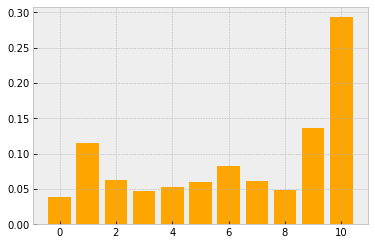

In [126]:
#This is to displays importance of each attributes in Decision Tree regression model.
important_feature_tree(DTR_CV)

### Linear Regression feature importance score

Feature: 0, Score: 0.117
Feature: 1, Score: -0.176
Feature: 2, Score: -0.013
Feature: 3, Score: 0.083
Feature: 4, Score: -0.041
Feature: 5, Score: 0.048
Feature: 6, Score: -0.106
Feature: 7, Score: -0.171
Feature: 8, Score: 0.009
Feature: 9, Score: 0.171
Feature: 10, Score: 0.209


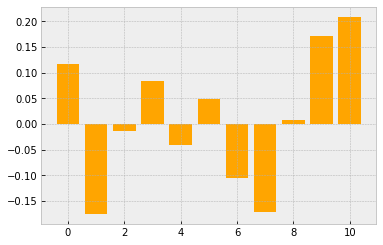

In [127]:
#This is to displays importance of each attributes in linear regression model.
important_feature_line(linear_reg)

### Random Forest Regression feature importance score

Feature: 0, Score: 0.049
Feature: 1, Score: 0.110
Feature: 2, Score: 0.055
Feature: 3, Score: 0.047
Feature: 4, Score: 0.062
Feature: 5, Score: 0.051
Feature: 6, Score: 0.081
Feature: 7, Score: 0.055
Feature: 8, Score: 0.056
Feature: 9, Score: 0.134
Feature: 10, Score: 0.301


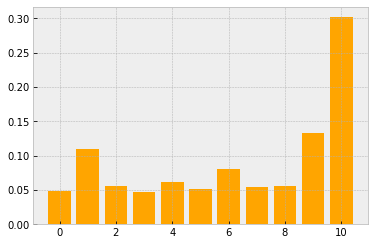

In [128]:
#This is to displays importance of each attributes in Random Forest regression model.
important_feature_tree(random_forest_reg)

# Classification Model evaluation

In [129]:
#This part is to create a dataframe to score evaluation result into the datset
result_df = pd.DataFrame(model_fit.history)

Text(0.5, 0, 'epoch')

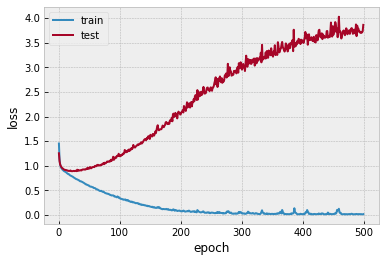

In [130]:
#This is to create loss and validation loss graph on train and test dataset
result_df[['loss', 'val_loss']].plot()
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

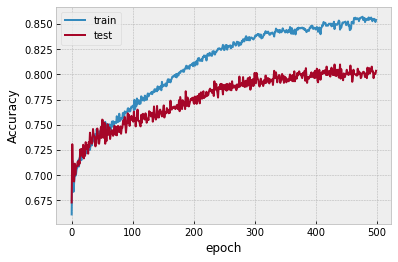

In [131]:
#This is to create accuracy and validation accuracy graph on train and test dataset

result_df[['accuracy','val_accuracy']].plot()
plt.legend(['train', 'test'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

In [132]:
#This is to display metrics and and its evaluation.

print(model.metrics_names)
print(model.evaluate(X_test,y_test_ts_class,verbose=0))

['loss', 'accuracy', 'precision', 'recall']
[11.287075996398926, 0.7328125238418579, 0.34049585461616516, 0.643750011920929]


In [133]:
le = LabelEncoder()
labels_tf = le.fit_transform(labels_tf)

In [134]:
#This part is to create prediction variable to create evaluation table

predictions = le.inverse_transform(np.argmax(model.predict(X_test_ts), axis=-1))

# Conclusion


## Regression model conclusion

In [135]:
#To display the R-square score table for all models.
sq_score_table

,Decision Tree Regression,Linear Regression,Random Forest Regression
Test set,-0.1306,0.2941,0.4357
Validate set,-1.3029,-0.3294,-0.4807
CV set,-0.6360,0.2250,0.2520


In [136]:
#To displays RMSE score table for all models.
RMSE_score_table

,Decision Tree Regression,Linear Regression,Random Forest Regression
Test set,0.8610,0.6804,0.6083
Validate set,0.9203,0.7032,0.6514
with CV,-0.9920,-0.6820,-0.6720


In [137]:
#To displays MAE score table for all models.
MAE_score_table

,Decision Tree Regression,Linear Regression,Random Forest Regression
Test set,0.5297,0.5286,0.4265
Validate set,0.5688,0.5555,0.4803
with CV,-0.6800,-0.5270,-0.5130


The first table indicates R-squared score. In this table, higer is better measure. Therefore, Ramdom Forest Regression is the best among all. Though it is possible to argue Decision Tree Regressor also has higher value. However, its fluctuation is too big. Thus, it is more appropriate to go with Random Forest Regressor.

The second table indiciates RMSE score. In this case, the lower value is better. Therefore, Random Forest Regression holds the best result.

In the third table, MAE score table, indicates the Random Forest Regression has the best result among all.

Therefore, Random Forest Regression has the best performace among all other models.


In [138]:
#This part is to display evaluation table.

print(classification_report(le.fit_transform(y_test),
                            predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.43      0.34      0.38       143
           2       0.39      0.47      0.42       122
           3       0.17      0.19      0.18        42
           4       0.00      0.00      0.00         1

    accuracy                           0.35       320
   macro avg       0.20      0.20      0.20       320
weighted avg       0.36      0.35      0.35       320



In this table, we need to determine Precision, Recall and Accuracy score.

Firstly, precision score is computed as number of positiv sample correctly predicted over total number of samples classified as Positive either its correct or incorrect. Therefore, the precision score indicates how reliable the model is in the classifying model.

Second, Recall score is computed as number of positive correct sample over total number of positive samples. The recall score indiicates how the positive samples are classifed.

Third Accuracy score is computed with total number of true positive plus total number of true negative over total number of true positive plus total nulber of false positive plus total number of false negative plus total number of true negative. This can be misleading indicator if the dataset is not balanced. 

In our case, it has 37 percent of accurnacy and precision, recall scores are vary.